In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [ ]:
df=pd.read_csv("/content/DATASET water_req.csv")

In [ ]:
df.head()

,CROP TYPE,SOIL TYPE,REGION,TEMPERATURE,WEATHER CONDITION,WATER REQUIREMENT
0,BANANA,DRY,DESERT,10-20,NORMAL,8.75
1,BANANA,DRY,DESERT,10-20,SUNNY,10.25
2,BANANA,DRY,DESERT,10-20,WINDY,9.65
3,BANANA,DRY,DESERT,10-20,RAINY,0.75
4,BANANA,DRY,DESERT,20-30,NORMAL,9.85


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2880 entries, 0 to 2879
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   CROP TYPE          2880 non-null   object 
 1   SOIL TYPE          2880 non-null   object 
 2   REGION             2880 non-null   object 
 3   TEMPERATURE        2880 non-null   object 
 4   WEATHER CONDITION  2880 non-null   object 
 5   WATER REQUIREMENT  2880 non-null   float64
dtypes: float64(1), object(5)
memory usage: 135.1+ KB


In [ ]:
df.isnull()

,CROP TYPE,SOIL TYPE,REGION,TEMPERATURE,WEATHER CONDITION,WATER REQUIREMENT
0,False,False,False,False,False,False
1,False,False,False,False,False,False
2,False,False,False,False,False,False
3,False,False,False,False,False,False
4,False,False,False,False,False,False
...,...,...,...,...,...,...
2875,False,False,False,False,False,False
2876,False,False,False,False,False,False
2877,False,False,False,False,False,False
2878,False,False,False,False,False,False


In [ ]:
df.isnull().sum()

CROP TYPE            0
SOIL TYPE            0
REGION               0
TEMPERATURE          0
WEATHER CONDITION    0
WATER REQUIREMENT    0
dtype: int64

In [ ]:
df.describe()


,WATER REQUIREMENT
count,2880.000000
mean,6.463141
std,22.687385
min,0.100000
25%,2.700000
50%,5.860000
75%,8.000000
max,606.000000


In [ ]:
import seaborn as sns

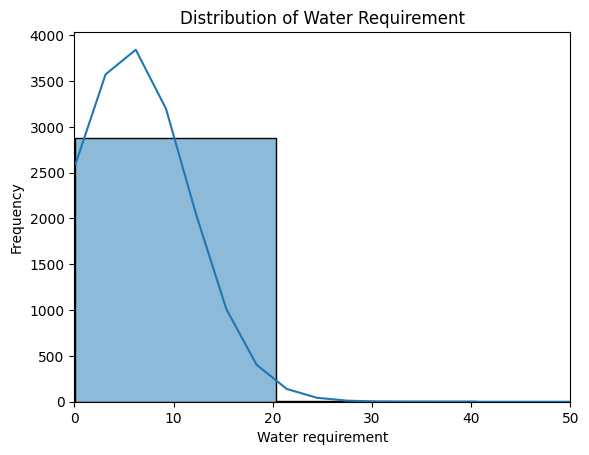

In [ ]:
sns.histplot(df['WATER REQUIREMENT'],bins=30 ,kde=True)
plt.xlim(0, 50)
plt.title('Distribution of Water Requirement')
plt.xlabel('Water requirement')
plt.ylabel('Frequency')
plt.show()

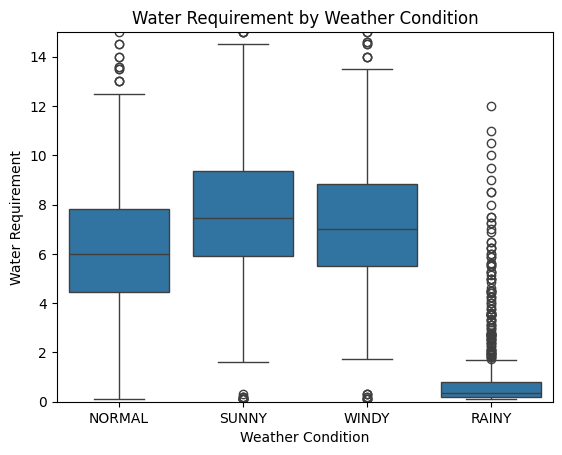

In [ ]:
sns.boxplot(x='WEATHER CONDITION' , y='WATER REQUIREMENT' ,data=df)
plt.ylim(0, 15)
plt.title('Water Requirement by Weather Condition')
plt.xlabel('Weather Condition')
plt.ylabel('Water Requirement')
plt.show()

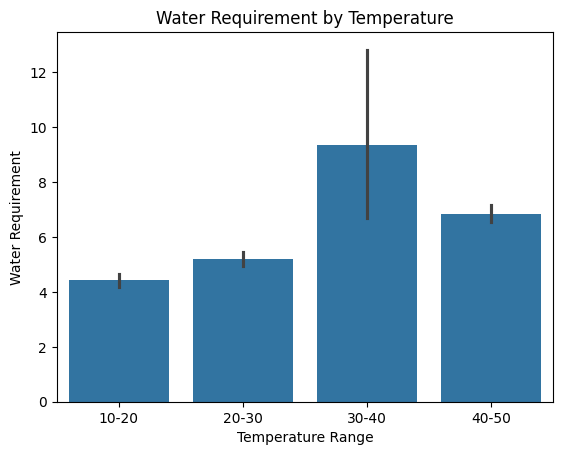

In [ ]:
sns.barplot(x='TEMPERATURE', y='WATER REQUIREMENT', data=df)
plt.title('Water Requirement by Temperature')
plt.xlabel('Temperature Range')
plt.ylabel('Water Requirement')
plt.show()


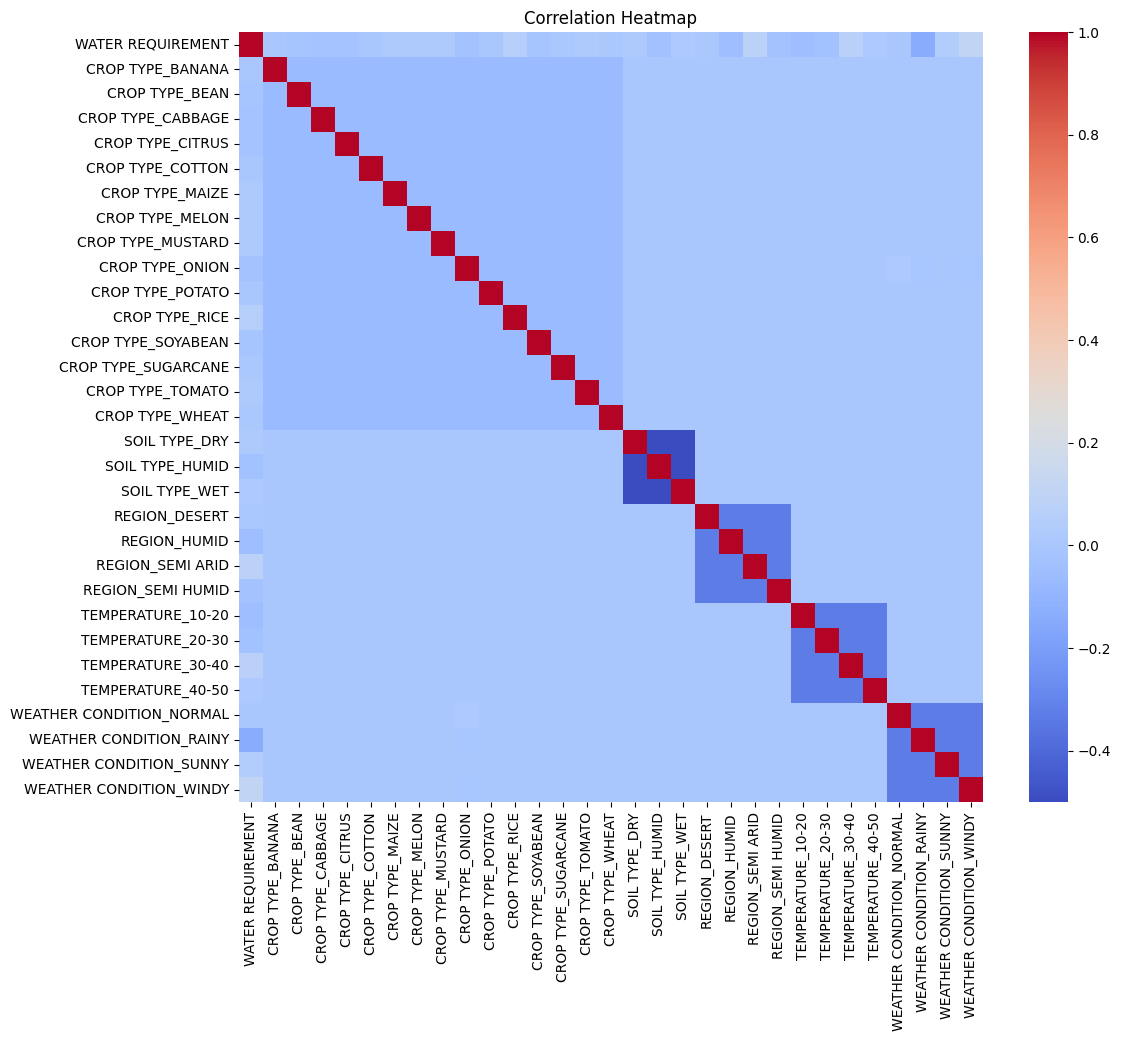

In [ ]:
data_encoded = pd.get_dummies(df, columns=['CROP TYPE', 'SOIL TYPE', 'REGION' , 'TEMPERATURE' , 'WEATHER CONDITION'])

correlation_matrix = data_encoded.corr()

plt.figure(figsize=(12,10))

sns.heatmap(correlation_matrix , annot=False ,cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

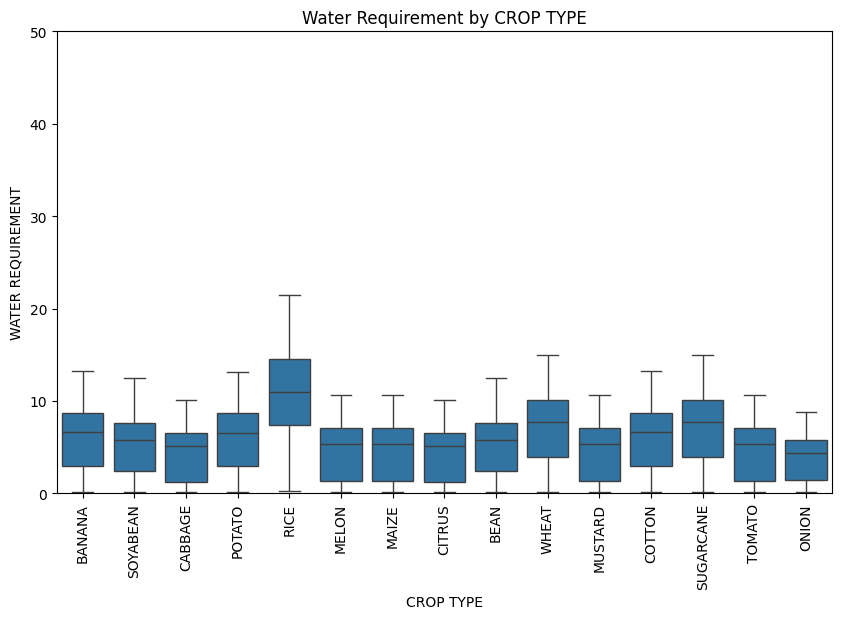

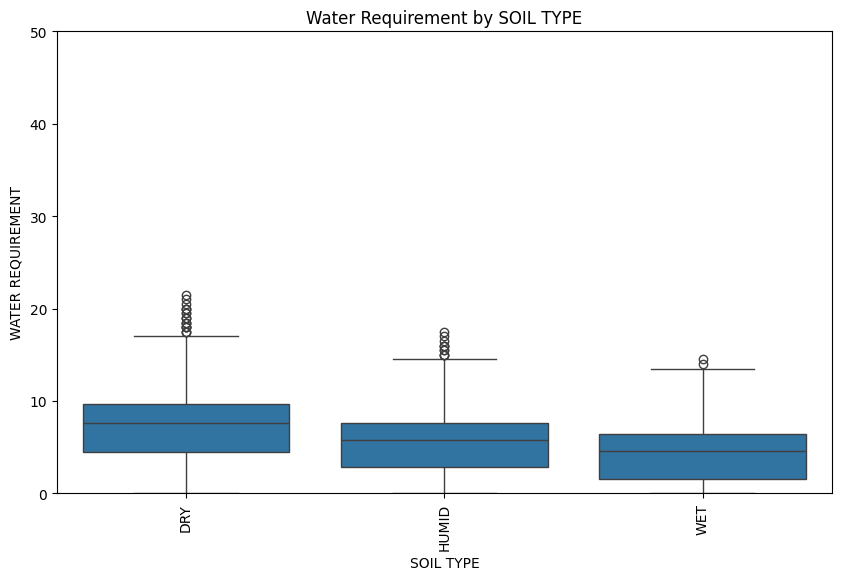

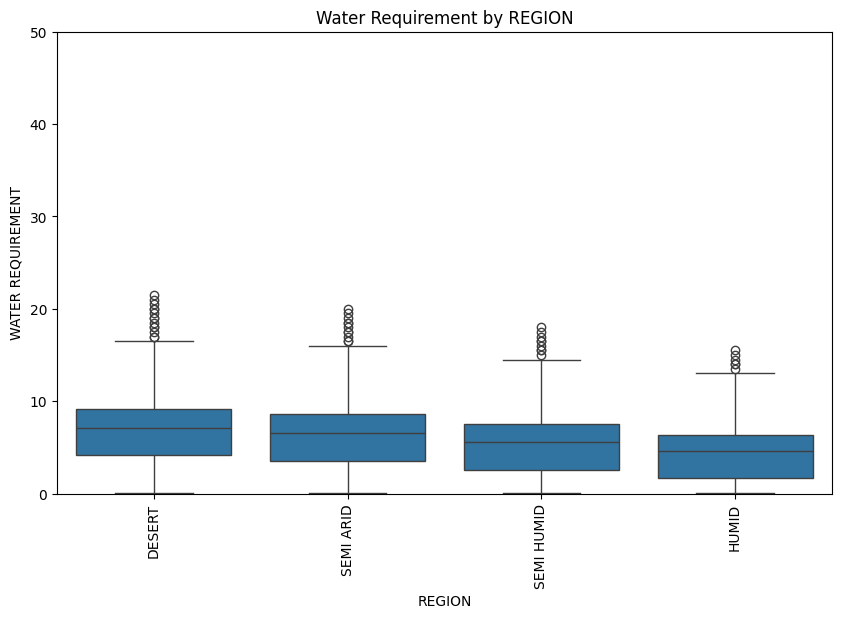

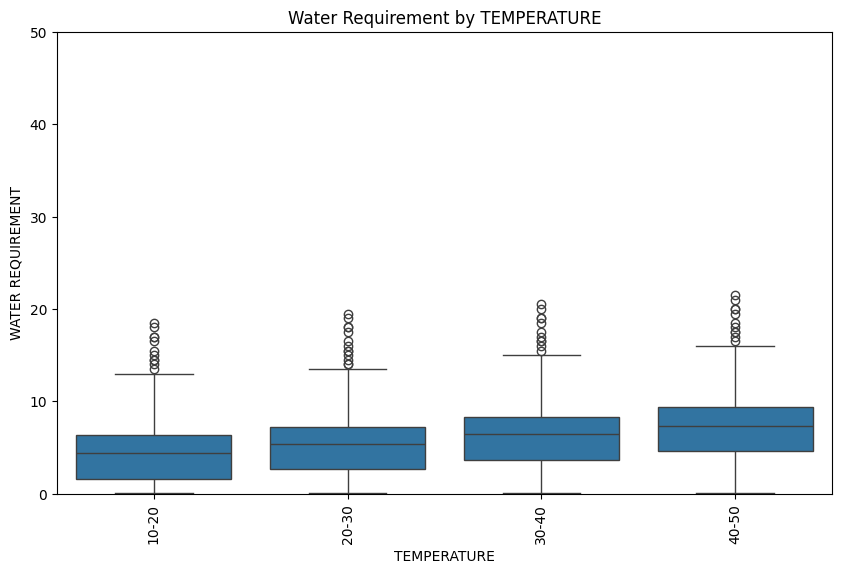

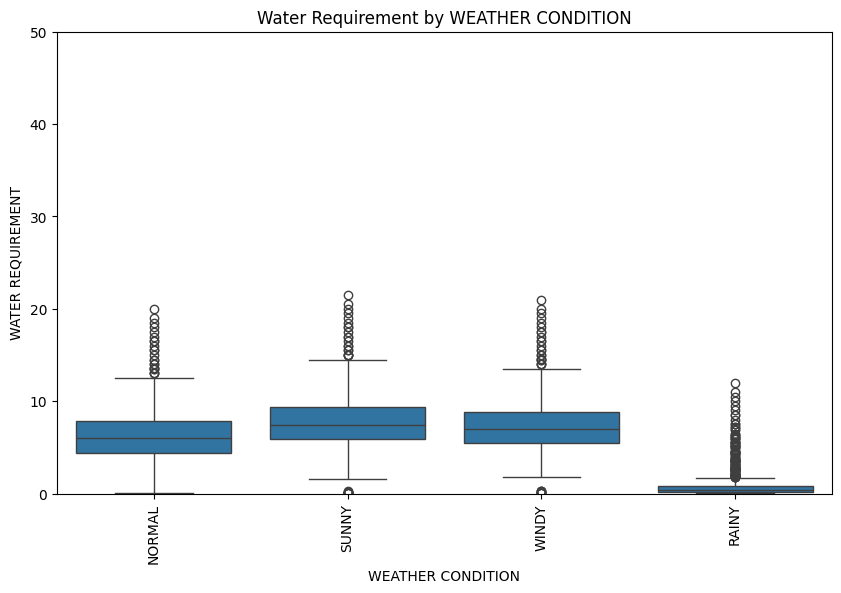

In [ ]:
# Boxplot for each categorical variable
categorical_features = ['CROP TYPE', 'SOIL TYPE', 'REGION', 'TEMPERATURE', 'WEATHER CONDITION']

for feature in categorical_features:
    plt.figure(figsize=(10, 6))
    sns.boxplot(x=feature, y='WATER REQUIREMENT', data=df)
    plt.xticks(rotation=90)
    plt.ylim(0, 50)
    plt.title(f'Water Requirement by {feature}')
    plt.show()


In [ ]:
# One-hot encode categorical variables
data_encoded = pd.get_dummies(df, columns=['CROP TYPE', 'SOIL TYPE', 'REGION', 'TEMPERATURE', 'WEATHER CONDITION'])
data_encoded.head()


,WATER REQUIREMENT,CROP TYPE_BANANA,CROP TYPE_BEAN,CROP TYPE_CABBAGE,CROP TYPE_CITRUS,CROP TYPE_COTTON,CROP TYPE_MAIZE,CROP TYPE_MELON,CROP TYPE_MUSTARD,CROP TYPE_ONION,...,REGION_SEMI ARID,REGION_SEMI HUMID,TEMPERATURE_10-20,TEMPERATURE_20-30,TEMPERATURE_30-40,TEMPERATURE_40-50,WEATHER CONDITION_NORMAL,WEATHER CONDITION_RAINY,WEATHER CONDITION_SUNNY,WEATHER CONDITION_WINDY
0,8.75,True,False,False,False,False,False,False,False,False,...,False,False,True,False,False,False,True,False,False,False
1,10.25,True,False,False,False,False,False,False,False,False,...,False,False,True,False,False,False,False,False,True,False
2,9.65,True,False,False,False,False,False,False,False,False,...,False,False,True,False,False,False,False,False,False,True
3,0.75,True,False,False,False,False,False,False,False,False,...,False,False,True,False,False,False,False,True,False,False
4,9.85,True,False,False,False,False,False,False,False,False,...,False,False,False,True,False,False,True,False,False,False
